# Azure AI Vision
## Background
### References
- Main article: https://learn.microsoft.com/en-us/python/api/overview/azure/cognitive-services?view=azure-python
- Overview of image analysis: https://learn.microsoft.com/en-us/python/api/overview/azure/ai-vision-imageanalysis-readme?view=azure-python

### Asynschronous client
A synchronous client supports synchronous analysis methods, meaning they will block until the service responds with analysis results. The code snippets below all use synchronous methods because it's easier for a getting-started guide. The SDK offers equivalent asynchronous APIs which are often preferred.

## Setup
### Install modules

In [11]:
# !pip install azure-cognitiveservices-vision-computervision
# !pip install azure-ai-vision-imageanalysis
# !pip install aiohttp

### Import dependencies

In [4]:
import os
from dotenv import load_dotenv

In [18]:
from pprint import pprint
import pandas as pd
from IPython.display import Image, display

In [2]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

### Global variables

In [5]:
# Load environment variables from file
load_dotenv()

# Get environment variables
VISION_ENDPOINT = os.getenv('VISION_ENDPOINT')
VISION_KEY = os.getenv('VISION_KEY')

In [ ]:
# Read secrets


## Use API
### Steps
- Create a client
- Load an image from disk
- Perform OCR through the API
- Print the text from the image

In [4]:
# Create an Image Analysis client for synchronous operations,
# using API key authentication
client = ImageAnalysisClient(
    endpoint=VISION_ENDPOINT,
    credential=AzureKeyCredential(VISION_KEY)
)

In [5]:
# Load image to analyze into a 'bytes' object
with open("test_image_001.jpg", "rb") as f:
    image_data = f.read()

In [17]:
# Extract text (OCR) from an image stream. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.READ]
)

C:\Users\User\AppData\Local\Temp\ipykernel_24600\1975265300.py:2: RuntimeWarning: coroutine 'ImageAnalysisClient.analyze' was never awaited
  result = client.analyze(


In [18]:
pprint(result)

{'modelVersion': '2023-10-01', 'metadata': {'width': 594, 'height': 846}, 'readResult': {'blocks': [{'lines': [{'text': "Joe's Diner", 'boundingPolygon': [{'x': 189, 'y': 60}, {'x': 407, 'y': 61}, {'x': 407, 'y': 93}, {'x': 189, 'y': 92}], 'words': [{'text': "Joe's", 'boundingPolygon': [{'x': 194, 'y': 61}, {'x': 288, 'y': 61}, {'x': 288, 'y': 92}, {'x': 193, 'y': 93}], 'confidence': 0.961}, {'text': 'Diner', 'boundingPolygon': [{'x': 311, 'y': 61}, {'x': 407, 'y': 62}, {'x': 407, 'y': 93}, {'x': 311, 'y': 92}], 'confidence': 0.996}]}, {'text': 'Ocean City, NJ', 'boundingPolygon': [{'x': 213, 'y': 120}, {'x': 383, 'y': 120}, {'x': 383, 'y': 145}, {'x': 213, 'y': 145}], 'words': [{'text': 'Ocean', 'boundingPolygon': [{'x': 215, 'y': 121}, {'x': 274, 'y': 122}, {'x': 274, 'y': 145}, {'x': 215, 'y': 146}], 'confidence': 0.993}, {'text': 'City,', 'boundingPolygon': [{'x': 286, 'y': 122}, {'x': 346, 'y': 121}, {'x': 346, 'y': 145}, {'x': 285, 'y': 145}], 'confidence': 0.989}, {'text': 'NJ',

### Response format
- Keys: `text`, `boundingPolygon`, `words`
- `text`: all the blocks of text found
- `boundingPolygon`: the position of the vertices around the text blocks
- `words`: the individual words and their bounding polygons

In [19]:
# Check image metadata
result['metadata']

{'width': 594, 'height': 846}

In [20]:
# Check text in image
ocr_results = result['readResult']['blocks'][0]['lines']
print(len(ocr_results), "text blocks found.")

17 text blocks found.


In [21]:
ocr_results[0]['words']

[{'text': "Joe's", 'boundingPolygon': [{'x': 194, 'y': 61}, {'x': 288, 'y': 61}, {'x': 288, 'y': 92}, {'x': 193, 'y': 93}], 'confidence': 0.961},
 {'text': 'Diner', 'boundingPolygon': [{'x': 311, 'y': 61}, {'x': 407, 'y': 62}, {'x': 407, 'y': 93}, {'x': 311, 'y': 92}], 'confidence': 0.996}]

### Summarise results
- ignore the words
- align the text with the average XY positions

In [22]:
def center_of_mass(polygon):
    '''
    Calculate the centre of mass of a polygon

    Args:
    - polygon (list of dict): [{'x': , 'y':}, ]

    Returns:
    - dict: {'x':, 'y':} average of all X and all Y
    '''

    return {'x': pd.DataFrame(polygon)['x'].mean(), 'y': pd.DataFrame(polygon)['y'].mean()}

In [23]:
text_blocks = []

for text_block in ocr_results:
    text = text_block['text']
    polygon = text_block['boundingPolygon']

    # Calculate the center of mass of the polygon
    CoM = center_of_mass(polygon)

    # Add the text to the dictinary
    CoM['text'] = text

    # Append to list of dict
    text_blocks.append(CoM)

# Convert to a DataFrame
text_blocks_df = pd.DataFrame(text_blocks)

In [15]:
text_blocks_df

NameError: name 'text_blocks_df' is not defined

## Tags

In [6]:
# Generate tags from an image. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.TAGS]
)

In [7]:
result

{'modelVersion': '2023-10-01', 'metadata': {'width': 612, 'height': 407}, 'tagsResult': {'values': [{'name': 'person', 'confidence': 0.9835193157196045}, {'name': 'clothing', 'confidence': 0.9828574061393738}, {'name': 'furniture', 'confidence': 0.9702439308166504}, {'name': 'man', 'confidence': 0.9587121605873108}, {'name': 'office building', 'confidence': 0.8846772909164429}, {'name': 'laptop', 'confidence': 0.873153567314148}, {'name': 'sitting', 'confidence': 0.8554558157920837}, {'name': 'business', 'confidence': 0.854299783706665}, {'name': 'suit', 'confidence': 0.842790961265564}, {'name': 'window', 'confidence': 0.8224737644195557}, {'name': 'table', 'confidence': 0.7635793685913086}, {'name': 'indoor', 'confidence': 0.741653323173523}, {'name': 'outdoor', 'confidence': 0.5578402280807495}]}}

In [8]:
result.keys()

dict_keys(['modelVersion', 'metadata', 'tagsResult'])

In [13]:
result['metadata']

{'width': 612, 'height': 407}

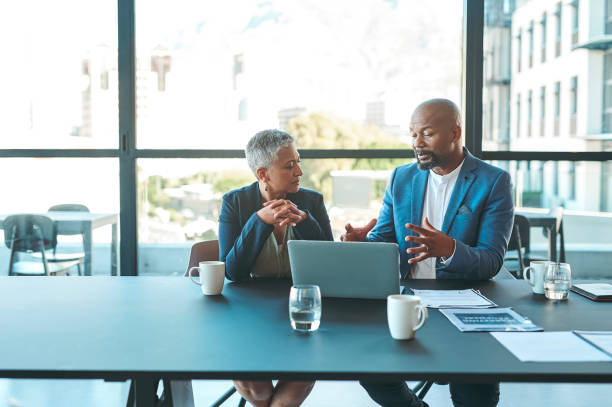

,confidence,name
0,0.983519,person
1,0.982857,clothing
2,0.970244,furniture
3,0.958712,man
4,0.884677,office building
5,0.873154,laptop
6,0.855456,sitting
7,0.854300,business
8,0.842791,suit
9,0.822474,window


In [17]:
# Display the image
display(Image(data=image_data))

pd.DataFrame(result['tagsResult']['values'])

## People and Objects

In [19]:
# Generate tags from an image. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.PEOPLE, VisualFeatures.OBJECTS]
)

In [28]:
result

{'modelVersion': '2023-10-01', 'metadata': {'width': 612, 'height': 407}, 'objectsResult': {'values': [{'boundingBox': {'x': 7, 'y': 214, 'w': 44, 'h': 56}, 'tags': [{'name': 'chair', 'confidence': 0.514}]}, {'boundingBox': {'x': 35, 'y': 211, 'w': 62, 'h': 63}, 'tags': [{'name': 'chair', 'confidence': 0.58}]}, {'boundingBox': {'x': 383, 'y': 292, 'w': 39, 'h': 50}, 'tags': [{'name': 'cup', 'confidence': 0.653}]}, {'boundingBox': {'x': 212, 'y': 133, 'w': 126, 'h': 139}, 'tags': [{'name': 'person', 'confidence': 0.793}]}, {'boundingBox': {'x': 357, 'y': 100, 'w': 165, 'h': 186}, 'tags': [{'name': 'person', 'confidence': 0.851}]}, {'boundingBox': {'x': 290, 'y': 235, 'w': 123, 'h': 65}, 'tags': [{'name': 'Laptop', 'confidence': 0.698}]}]}, 'peopleResult': {'values': [{'boundingBox': {'x': 216, 'y': 128, 'w': 120, 'h': 278}, 'confidence': 0.7713886499404907}, {'boundingBox': {'x': 342, 'y': 97, 'w': 175, 'h': 309}, 'confidence': 0.6024842858314514}]}}

In [21]:
result.keys()

dict_keys(['modelVersion', 'metadata', 'objectsResult', 'peopleResult'])

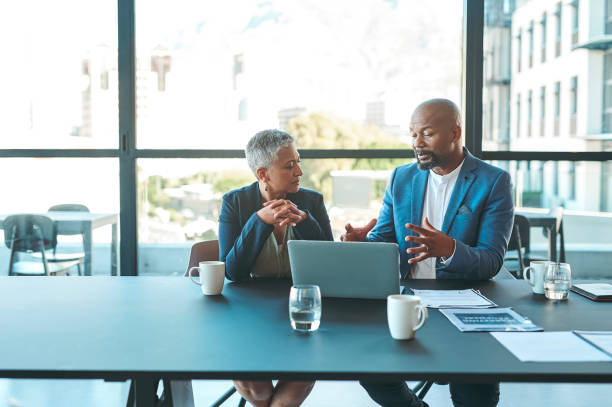

In [27]:
# Display the image
display(Image(data=image_data))

In [25]:
result['peopleResult']['values']

[{'boundingBox': {'x': 216, 'y': 128, 'w': 120, 'h': 278}, 'confidence': 0.7713886499404907},
 {'boundingBox': {'x': 342, 'y': 97, 'w': 175, 'h': 309}, 'confidence': 0.6024842858314514}]

### People detection as part of object detection
It is interesting to notice that the model detects people in the same location as the People Detection Model. The confidence of the object model is however higher (85% instead of 60%) for the person sitting on the right.

In [24]:
result['objectsResult']['values']

[{'boundingBox': {'x': 7, 'y': 214, 'w': 44, 'h': 56}, 'tags': [{'name': 'chair', 'confidence': 0.514}]},
 {'boundingBox': {'x': 35, 'y': 211, 'w': 62, 'h': 63}, 'tags': [{'name': 'chair', 'confidence': 0.58}]},
 {'boundingBox': {'x': 383, 'y': 292, 'w': 39, 'h': 50}, 'tags': [{'name': 'cup', 'confidence': 0.653}]},
 {'boundingBox': {'x': 212, 'y': 133, 'w': 126, 'h': 139}, 'tags': [{'name': 'person', 'confidence': 0.793}]},
 {'boundingBox': {'x': 357, 'y': 100, 'w': 165, 'h': 186}, 'tags': [{'name': 'person', 'confidence': 0.851}]},
 {'boundingBox': {'x': 290, 'y': 235, 'w': 123, 'h': 65}, 'tags': [{'name': 'Laptop', 'confidence': 0.698}]}]